In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.realpath('..'))

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
from copy import deepcopy

from tracking_v2.target import SingleTurnTarget
from tracking_v2.kalman import LinearKalmanFilter, CoordinatedTurn, CoordinatedTurn2D
from tracking_v2.motion import ConstantVelocityModel, ConstantAccelerationModel, SingerAccelerationModel
from tracking_v2.sensor import GeometricSensor
from tracking_v2.evaluation import run_many, evaluate_many, plot_nees

from tracking.util import to_df

In [4]:
target = SingleTurnTarget(30, 1)
sensor = GeometricSensor()

positions = target.true_states(1, 400+1)

In [9]:
kf = CoordinatedTurn([1, 1, 1, .0001])

ct = run_many(100, 400, target, sensor, kf)
ct_eval = evaluate_many(ct[0][:,:,:6,:], ct[1][:,:,:6,:6], positions[1:,:])

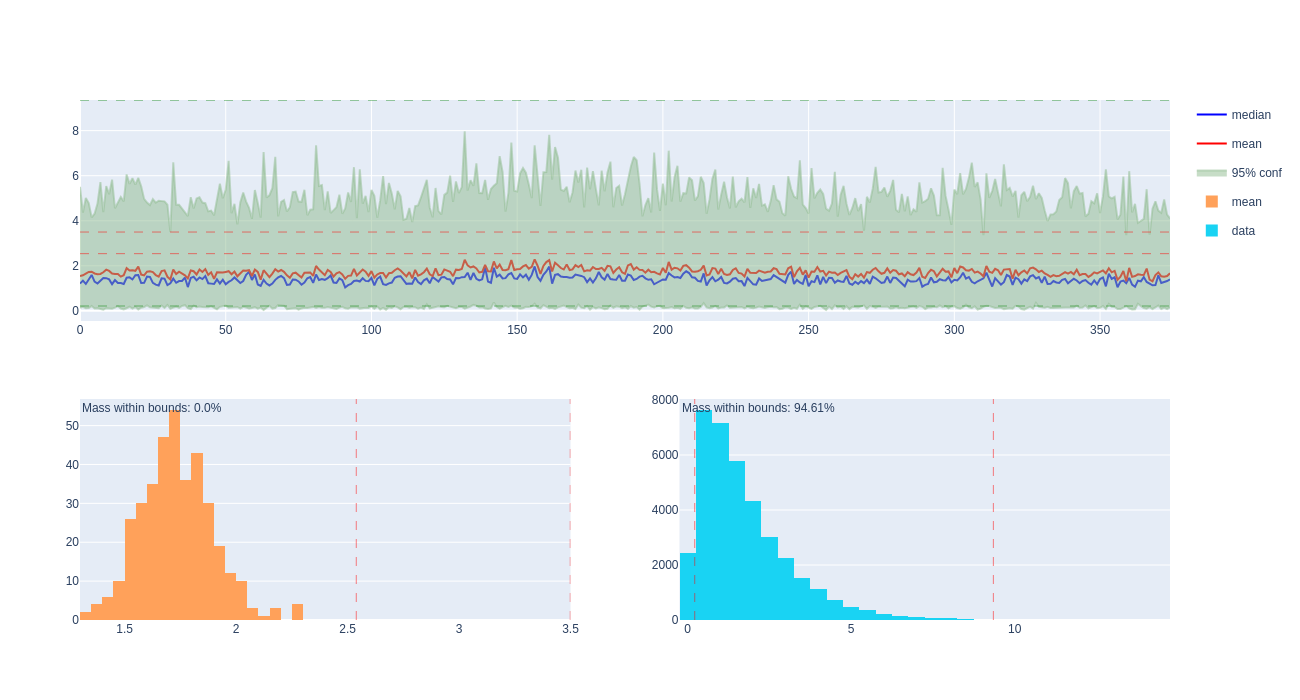

In [10]:
plot_nees(ct_eval.position_nees)

In [11]:
motion = ConstantVelocityModel(1)
kf = LinearKalmanFilter(motion, [[1, 0, 0, 0, 0, 0],
                                 [0, 1, 0, 0, 0, 0],
                                 [0, 0, 1, 0, 0, 0]])

cv = run_many(100, 400, target, sensor, kf)
cv_eval = evaluate_many(cv[0], cv[1], positions[1:,:])

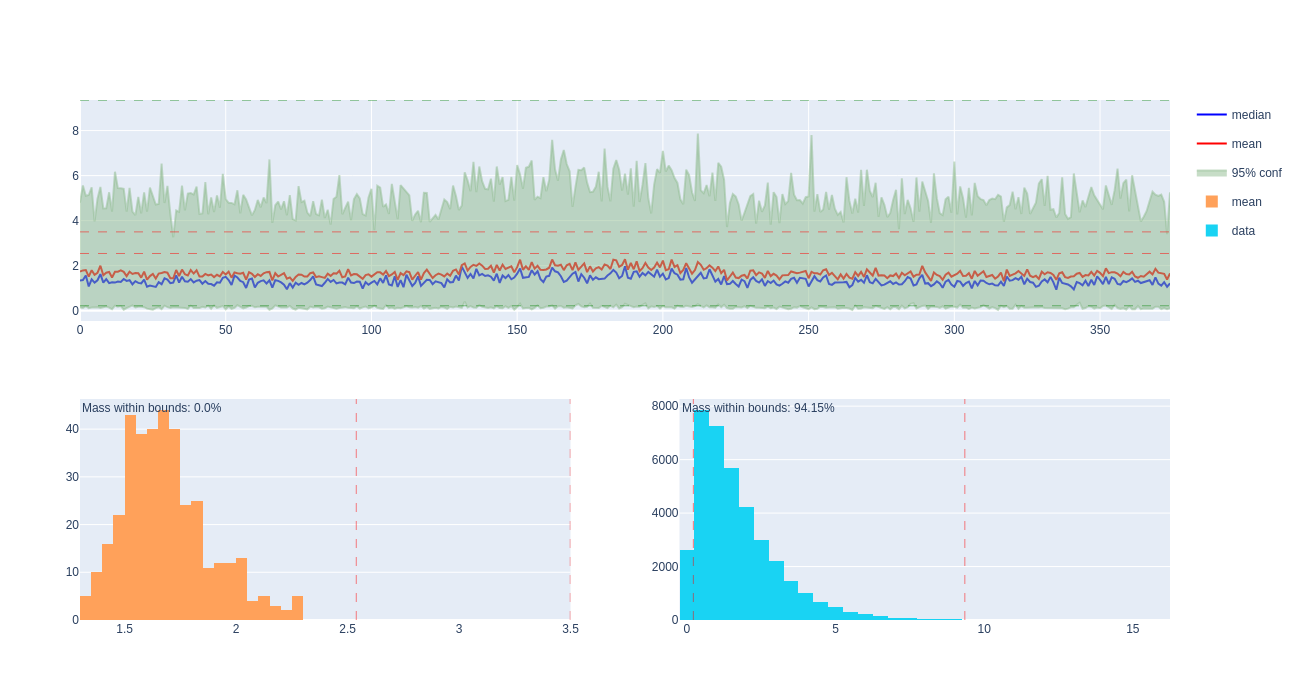

In [12]:
plot_nees(cv_eval.position_nees)

In [25]:
motion = ConstantAccelerationModel(0.1)
kf = LinearKalmanFilter(motion, [[1, 0, 0, 0, 0, 0, 0, 0, 0],
                                 [0, 1, 0, 0, 0, 0, 0, 0, 0],
                                 [0, 0, 1, 0, 0, 0, 0, 0, 0]])

ca = run_many(100, 400, target, sensor, kf)
ca_eval = evaluate_many(ca[0][:,:,:6,:], ca[1][:,:,:6,:6], positions[1:,:])

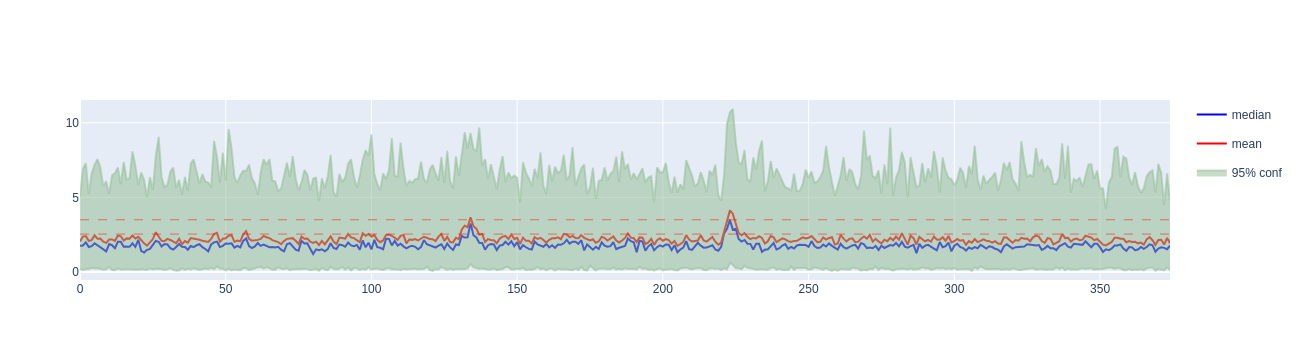

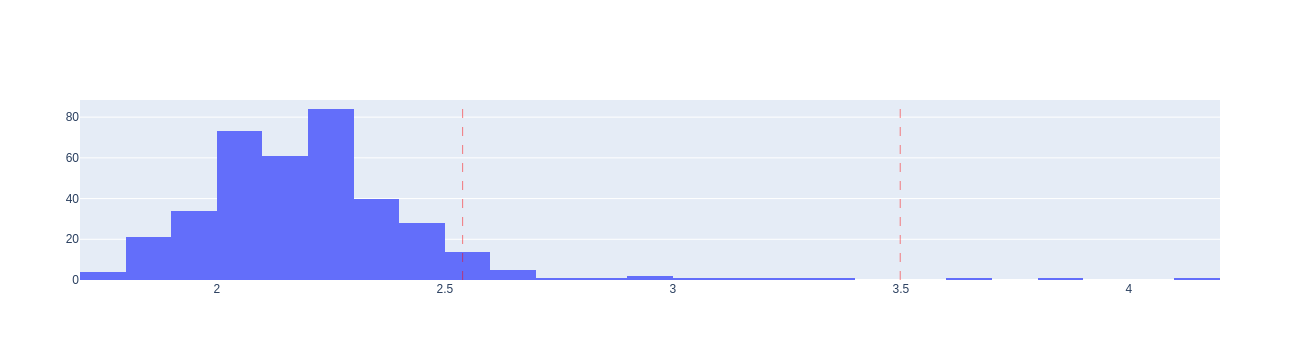

In [26]:
plot_nees(ca_eval.position_nees)

In [28]:
kf = LinearKalmanFilter(SingerAccelerationModel(1, 2), [[1, 0, 0, 0, 0, 0, 0, 0, 0],
                                                        [0, 1, 0, 0, 0, 0, 0, 0, 0],
                                                        [0, 0, 1, 0, 0, 0, 0, 0, 0]])

si = run_many(100, 400, target, sensor, kf)
si_eval = evaluate_many(si[0][:,:,:6,:], si[1][:,:,:6,:6], positions[1:,:])

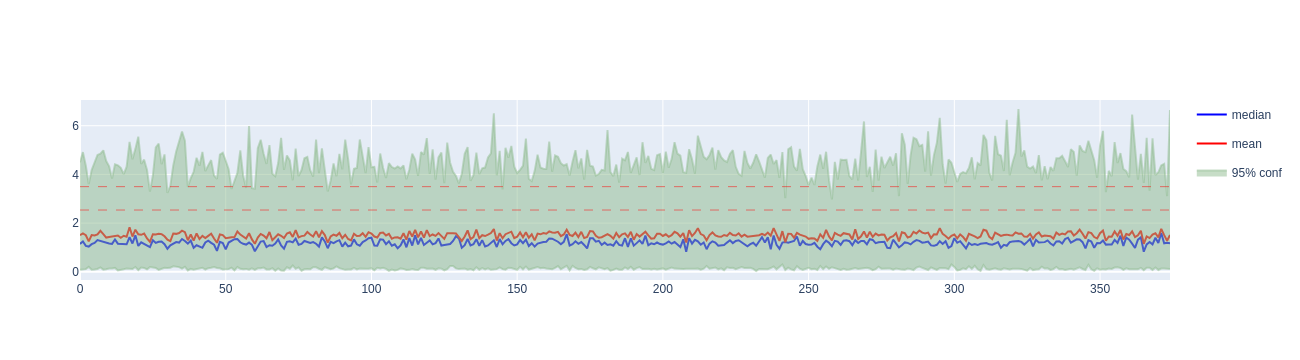

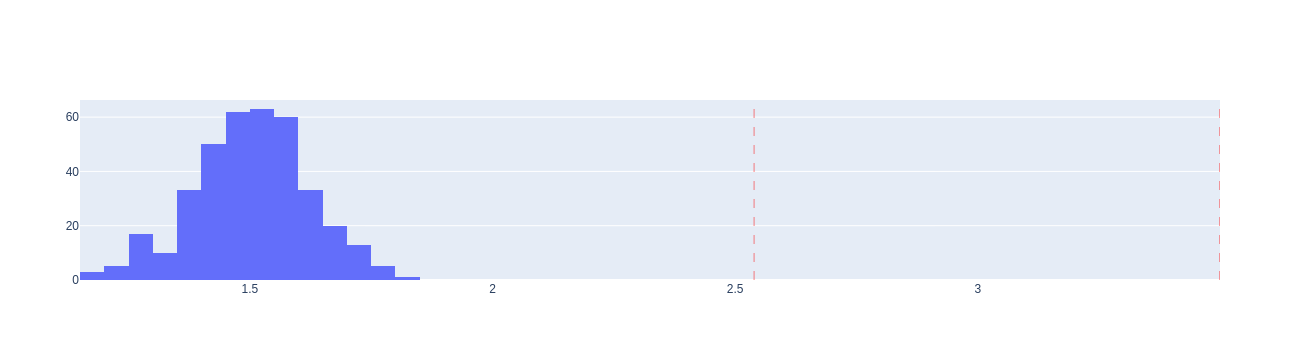

In [29]:
plot_nees(si_eval.position_nees)